In [1]:
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Height-Weight Data.csv')
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [3]:
df.shape

(3501, 2)

In [4]:
x = df.drop('Weight',axis=1)
y= df[['Weight']]

Text(0.5, 1.0, 'Height vs Weight')

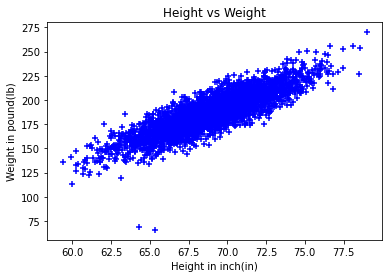

In [9]:
plt.scatter(df.Height,df.Weight,color='blue',marker='+')   #plt.scatter(x,y,color='blue',marker='+')
plt.xlabel('Height in inch(in)')
plt.ylabel('Weight in pound(lb)')
plt.title('Height vs Weight')

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([[5.96232913]])

In [12]:
lr.intercept_

array([-224.77329699])

In [13]:
lr.predict([[70]])

array([[192.58974182]])

In [14]:
df['predicted_weight']=lr.predict(x)
df

,Height,Weight,predicted_weight
0,73.847017,241.893563,215.526923
1,68.781904,162.310473,185.327053
2,74.110105,212.740856,217.095543
3,71.730978,220.042470,202.910405
4,69.881796,206.349801,191.884970
...,...,...,...
3496,69.296830,185.649086,188.397211
3497,70.542201,210.198845,195.822525
3498,73.912549,202.429960,215.917648
3499,67.396021,144.277671,177.063961


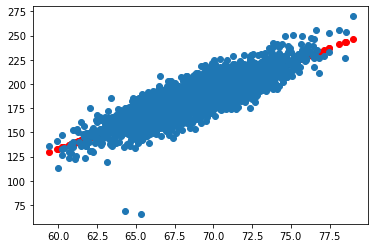

In [16]:
plt.scatter(x,df[['predicted_weight']],color='red')
plt.scatter(x,y)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(ytest,lr.predict(xtest))
mse = mean_squared_error(ytest,lr.predict(xtest))

print(mae)

8.040126312816263


In [18]:
print(mse)

97.21750513299327


In [19]:
lr.score(xtest,ytest)

0.7461790585161445

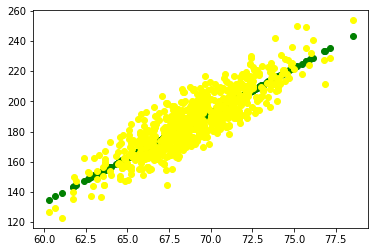

In [21]:
plt.scatter(xtest,lr.predict(xtest),color='green')
plt.scatter(xtest,ytest,color='yellow')